**第1章 QuantLib入門とTiborレートの実装**

In [1]:
# カレンダーオブジェクトの作成
import datetime ; import numpy as np
import QuantLib as ql
calJP = ql.Japan()

In [2]:
help(calJP)

Help on Japan in module QuantLib.QuantLib object:

class Japan(Calendar)
 |  Proxy of C++ QuantLib::Japan class.
 |
 |  Method resolution order:
 |      Japan
 |      Calendar
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self)
 |      __init__(Japan self) -> Japan
 |
 |  __repr__ = _swig_repr(self) from QuantLib.QuantLib
 |
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |
 |  __swig_destroy__ = delete_Japan(object, /)
 |      delete_Japan(Japan self)
 |
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |
 |  thisown
 |      The membership flag
 |
 |  ----------------------------------------------------------------------
 |  Methods inherited from Calendar:
 |
 |  __eq__(self, other)
 |      __eq__(Calendar self, Calendar other) -> bool
 |
 |  __hash__(self)
 |      __hash__(Calendar self) -> hash_t
 |
 |  __ne__(self, other)
 |      __ne__(C

In [3]:
calJP.isHoliday(ql.Date('2022-08-11', '%Y-%m-%d'))

True

In [4]:
calJP.advance(ql.Date('2022-08-10', '%Y-%m-%d'), ql.Period('2d'))

Date(15,8,2022)

In [5]:
calJP.advance(ql.Date('2022-08-10', '%Y-%m-%d'), 2, ql.Days)

Date(15,8,2022)

In [6]:
(calJP.advance(ql.Date('2022-08-10', '%Y-%m-%d'), 2, ql.Days)).ISO()

'2022-08-15'

In [7]:
dt1 = datetime.date.fromisoformat('2022-08-11')
ql.Date().from_date(dt1)

Date(11,8,2022)

In [8]:
dt2 = ql.Date('2022-08-11', '%Y-%m-%d')
dt2.to_date()

datetime.date(2022, 8, 11)

In [9]:
help(ql.Date())

Help on Date in module QuantLib.QuantLib object:

class Date(builtins.object)
 |  Date(*args)
 |
 |  Proxy of C++ Date class.
 |
 |  Methods defined here:
 |
 |  ISO(self)
 |      ISO(Date self) -> std::string
 |
 |  __add__ = Date_new___add__(self, x) from QuantLib.QuantLib
 |
 |  __bool__(self)
 |      __bool__(Date self) -> bool
 |
 |  __eq__(self, other)
 |      __eq__(Date self, Date other) -> bool
 |
 |  __ge__(self, other)
 |      __ge__(Date self, Date other) -> bool
 |
 |  __gt__(self, other)
 |      __gt__(Date self, Date other) -> bool
 |
 |  __hash__(self)
 |      __hash__(Date self) -> hash_t
 |
 |  __init__(self, *args)
 |      __init__(Date self) -> Date
 |      __init__(Date self, Day d, Month m, Year y) -> Date
 |      __init__(Date self, Day d, Month m, Year y, Hour hours, Minute minutes, Second seconds, Millisecond millisec=0, Microsecond microsec=0) -> Date
 |      __init__(Date self, BigInteger serialNumber) -> Date
 |      __init__(Date self, std::string const & s

In [10]:
ql.Date().todaysDate()

Date(23,10,2025)

In [11]:
dates = [ql.Date('2022-08-03', '%Y-%m-%d'),ql.Date('2022-11-04', '%Y-%m-%d'), 
         ql.Date('2023-02-03', '%Y-%m-%d'),ql.Date('2023-08-03', '%Y-%m-%d')]
zeros = [0.0, 0.01, 0.02, 0.03]
dcA365   = ql.Actual365Fixed()
curveOBJ = ql.ZeroCurve(dates, zeros, dcA365, calJP)
           # 残り3つの引数の初期値は ql.Linear(), ql.Continuous, ql.Annual
curveOBJ.nodes()

((Date(3,8,2022), 0.0),
 (Date(4,11,2022), 0.01),
 (Date(3,2,2023), 0.02),
 (Date(3,8,2023), 0.03))

In [12]:
#help(curveOBJ)
curveOBJ.discount(ql.Date('2023-03-01', '%Y-%m-%d')) 

0.9877424354295338

In [13]:
print('dayCounter   :', curveOBJ.dayCounter())
print('referenceDate:', curveOBJ.referenceDate())
print('times    {:.6f}, {:.6f}, {:.6f}, {:.6f}'.format(*curveOBJ.times()) )
print('discount {:.6f}, {:.6f}, {:.6f}, {:.6f}'
                         .format(*[curveOBJ.discount(dt) for dt in dates]))

dayCounter   : Actual/365 (Fixed) day counter
referenceDate: August 3rd, 2022
times    0.000000, 0.254795, 0.504110, 1.000000
discount 1.000000, 0.997455, 0.989968, 0.970446


In [14]:
rate0503 = curveOBJ.zeroRate(ql.Date('2023-05-03', '%Y-%m-%d'),
                                          dcA365, ql.Continuous)
print(rate0503)     #print(rate0503.rate())

2.491713 % Actual/365 (Fixed) continuous compounding


In [15]:
# matplotlibの表示設定 (日本語フォントとサイズ, グラフのサイズ)
import matplotlib.pyplot as plt
plt.rcParams.update({"font.family":"MS Gothic","font.size":9,
                                          "figure.figsize":[4.5,2.5]})

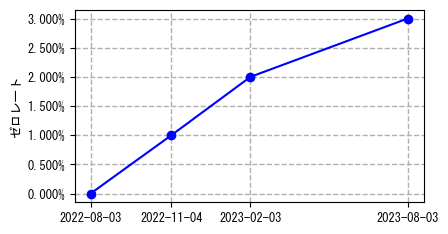

In [16]:
cDates, cRates = zip(*curveOBJ.nodes())                         # nodesの転置
cDates         = [dt.to_date() for dt in cDates]                # date型変換
fig, ax        = plt.subplots()                                 # axオブジェクト作成
ax.plot(cDates, cRates, color="b", marker='o')                  # グラフ描写
ax.grid(linestyle='--',linewidth=1)                             # グリッド表示
ax.set_ylabel('ゼロレート') ; ax.set_xticks(cDates)              # x軸の表示の調整

import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,3))       # y軸の%表示

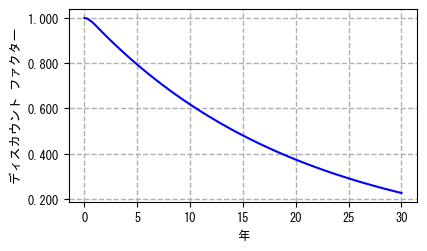

In [17]:
curveOBJ.enableExtrapolation()                                      # カーブの補外計算
timeTICK = np.linspace(0.0, 30.0, 121)                              # x軸準備
discFCTR = [curveOBJ.discount(t) for t in timeTICK]                 # y軸準備

_, ax = plt.subplots(); ax.grid(linestyle='--',linewidth=1)         # ax作成とグリッド表示
ax.plot(timeTICK, discFCTR, color="b")                              # グラフ作成
ax.set_ylabel('ディスカウント ファクター'); ax.set_xlabel('年')       # 軸ラベル
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))      # y軸桁数 調整

In [18]:
cmpdSPL, freqA = ql.Simple, ql.Annual
curveOBJ = ql.ZeroCurve(dates, zeros, dcA365, calJP, ql.Linear(), cmpdSPL, freqA)
curveOBJ.discount(ql.Date('2022-11-04', '%Y-%m-%d')) 

0.9974585303200065

In [19]:
print('todayDate:      ', ql.Date().todaysDate())
print('evaluationDate: ', ql.Settings.instance().evaluationDate)

todayDate:       October 23rd, 2025
evaluationDate:  October 23rd, 2025


In [20]:
tradeDT = ql.Date('2022-08-01','%Y-%m-%d')
ql.Settings.instance().evaluationDate = tradeDT
calJP, Tp2 = ql.Japan(), 2                         # Tp2 := T+2
settleDT = calJP.advance(tradeDT, Tp2, ql.Days)

tbr3m  = ql.Tibor(ql.Period('3M'))
tbr6m  = ql.Tibor(ql.Period('6M'))
tbr12m = ql.Tibor(ql.Period('12M'))

rate3m  = ql.SimpleQuote(0.01)
rate6m  = ql.SimpleQuote(0.02)
rate12m = ql.SimpleQuote(0.03)

helper3m  = ql.DepositRateHelper(ql.QuoteHandle(rate3m),   tbr3m)
helper6m  = ql.DepositRateHelper(ql.QuoteHandle(rate6m),   tbr6m) 
helper12m = ql.DepositRateHelper(ql.QuoteHandle(rate12m),  tbr12m)
helpers   = [helper3m, helper6m, helper12m ]

curveOBJ = ql.PiecewiseLogLinearDiscount(settleDT, helpers, dcA365)
curveOBJ.nodes()

((Date(3,8,2022), 1.0),
 (Date(4,11,2022), 0.9974585303200327),
 (Date(3,2,2023), 0.9900184441792355),
 (Date(3,8,2023), 0.9708737864077671))

In [21]:
rate3m.setValue(0.02)
curveOBJ.nodes()

((Date(3,8,2022), 1.0),
 (Date(4,11,2022), 0.9949299460284549),
 (Date(3,2,2023), 0.9900184441792355),
 (Date(3,8,2023), 0.9708737864077671))

In [22]:
rate3m.setValue(0.01) # 3か月を0.01へ戻しておく

In [23]:
helper3m.quote().value()

0.01

In [24]:
curveHDL = ql.YieldTermStructureHandle(curveOBJ)
tbr6m    = ql.Tibor(ql.Period('6M'), curveHDL)

In [25]:
tradeDT = ql.Date('2022-08-01', '%Y-%m-%d')
settleDT = tbr3m.valueDate(tradeDT)         #2022-08-03
print('trade          : ', tradeDT.ISO())
print('settle         : ', settleDT.ISO())
print('--------------- ------------')
print('fixingDays     : ', tbr3m.fixingDays())
print('fixingDate     : ', tbr3m.fixingDate(settleDT).ISO())
print('name           : ', tbr3m.name())                 # nameメソッドを追加
print('tenor          : ', tbr3m.tenor())
print('dayCounter     : ', tbr3m.dayCounter())
print('fixingCalendar : ', tbr3m.fixingCalendar())
print('maturityDate   : ', tbr3m.maturityDate(settleDT).ISO())

trade          :  2022-08-01
settle         :  2022-08-03
--------------- ------------
fixingDays     :  2
fixingDate     :  2022-08-01
name           :  Tibor3M Actual/365 (Fixed)
tenor          :  3M
dayCounter     :  Actual/365 (Fixed) day counter
fixingCalendar :  Japan calendar
maturityDate   :  2022-11-04


In [26]:
curveOBJ.discount(ql.Date('2023-03-01', '%Y-%m-%d')) 

0.98724533619916

In [27]:
from myABBR import *
calJP.advance(jDT(2022,8,10), Tp2, DD)

Date(15,8,2022)

In [28]:
from myABBR import *

# シンプルクォート
def sqHDL(xx):   
  '''sqHDL(xx)=ql.QuoteHandle(ql.SimpleQuote(xx))''' 
  return ql.QuoteHandle(ql.SimpleQuote(xx))

In [29]:
from myABBR import * ; import myUtil as mu
# InterestRate class  (金利 1.0%)
iRate, settleDT = 0.01, jDT(2022,8,3)
iRateOBJ = ql.InterestRate(iRate, dcA365, cmpdSPL, freqSA)
print('Object:', iRateOBJ, end=', ')
print('rateメソッド:{:.5%}'.format(iRateOBJ.rate()) )
print('discountFactorメソッド:{:.7f}'.format(
    iRateOBJ.discountFactor(settleDT, jDT(2022,11,4))) )

Object: 1.000000 % Actual/365 (Fixed) simple compounding, rateメソッド:1.00000%
discountFactorメソッド:0.9974585


In [30]:
# FlatForward class
ffCrvOBJ = ql.FlatForward(settleDT, iRate, dcA365, cmpdSPL, freqSA)
ffCrvHDL = ql.YieldTermStructureHandle(ffCrvOBJ)
print('3ヶ月DF:{:.7f}'.format( ffCrvOBJ.discount(jDT(2022,11,4)) ) )

3ヶ月DF:0.9974585


In [31]:
# フラットフォワード ** OBJとTSHの2つを戻す点に注意  **
def ffTSH(settleDT, rate, dc=dcA365, cmpd=2, freq=1):   
  '''ffTSH(settleDT,rate,dc=dcA365,cmpd=2,freq=1) 
                                    = ffCrvOBJ,ql.YTS(ql.FlatForward(...))
     cmpd=2:Continuous 1:Compounded, freq=1:Annual 2:Semiannual''' 
  ffCrvOBJ = ql.FlatForward(settleDT, rate, dc, cmpd, freq)
  ffCrvOBJ.enableExtrapolation()
  return (ffCrvOBJ, ql.YieldTermStructureHandle(ffCrvOBJ))

In [32]:
from myABBR import * ; import myUtil as mu
import xlwings as xw
@xw.func

def tiborDF(r3m, r6m, r12m, tgtDT):
    tradeDT  = jDT(2022,8,1) ;     setEvDT(tradeDT)
    settleDT = calJP.advance(tradeDT, Tp2, DD)
    tbr3m    = ql.Tibor(pdFreqQ )
    tbr6m    = ql.Tibor(pdFreqSA)
    tbr12m   = ql.Tibor(pdFreqA )

    rate3mHDL  = mu.sqHDL( r3m)
    rate6mHDL  = mu.sqHDL( r6m)
    rate12mHDL = mu.sqHDL(r12m)        

    helper3m  = ql.DepositRateHelper(rate3mHDL,  tbr3m)
    helper6m  = ql.DepositRateHelper(rate6mHDL,  tbr6m) 
    helper12m = ql.DepositRateHelper(rate12mHDL,tbr12m)
    helpers   = [helper3m, helper6m, helper12m ]

    curveOBJ = ql.PiecewiseLogLinearDiscount(settleDT, helpers, dcA365)
    curveOBJ.enableExtrapolation()
    return curveOBJ.discount( dDT(tgtDT) ) 

In [33]:
tiborDF(0.01, 0.02, 0.03, dt.datetime(2022,11,4) )

0.9974585303200327

In [34]:
!pip show xlwings
#!pip install xlwings

Name: xlwings
Version: 0.33.16
Summary: Make Excel fly: Interact with Excel from Python and vice versa.
Home-page: https://www.xlwings.org
Author: Zoomer Analytics LLC
Author-email: Felix Zumstein <felix.zumstein@zoomeranalytics.com>
License: BSD 3-clause
Location: E:\local\anaconda3\Lib\site-packages
Requires: pywin32
Required-by: 


In [35]:
@xw.func
@xw.arg('data', ndim=1)
def tiborDF2(data):
    r3m, r6m, r12m, tgtDT = data
    tradeDT  = jDT(2022,8,1) ;  setEvDT(tradeDT)
    settleDT = calJP.advance(tradeDT, Tp2, DD)
    tbr3m    = ql.Tibor(pdFreqQ )
    tbr6m    = ql.Tibor(pdFreqSA)
    tbr12m   = ql.Tibor(pdFreqA )

    rate3mHDL  = mu.sqHDL( r3m)
    rate6mHDL  = mu.sqHDL( r6m)
    rate12mHDL = mu.sqHDL(r12m)        

    helper3m  = ql.DepositRateHelper(rate3mHDL,  tbr3m)
    helper6m  = ql.DepositRateHelper(rate6mHDL,  tbr6m) 
    helper12m = ql.DepositRateHelper(rate12mHDL,tbr12m)
    helpers   = [helper3m, helper6m, helper12m ]

    curveOBJ = ql.PiecewiseLogLinearDiscount(settleDT, helpers, dcA365)
    curveOBJ.enableExtrapolation()
    return curveOBJ.discount( dDT(tgtDT) ) 

In [36]:
x = [0.01, 0.02, 0.03, dt.datetime(2022,11,4)]
tiborDF2(x)

0.9974585303200327